<a href="https://colab.research.google.com/github/sidhu2690/422/blob/main/06_and_07_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

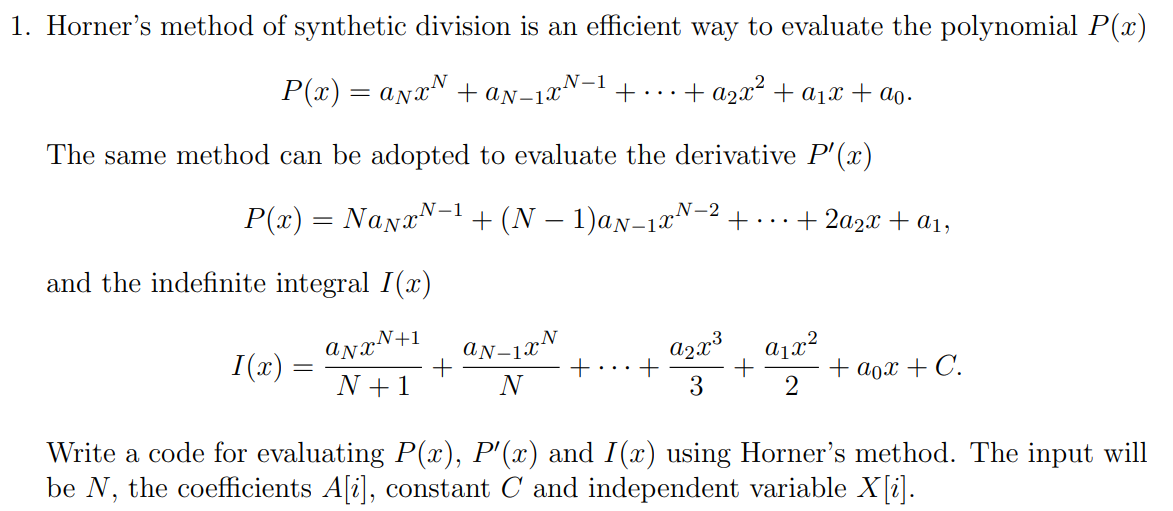

In [3]:
def horner_poly(a, x):
  n = len(a)
  result = a[0]
  for i in range(1, n):
      result = result * x + a[i]
  return result

# Here we don't explicitly pass N because Python can infer it from the length of the coefficient list.

In [4]:
a = [3, 2]  # 3x + 2
horner_poly(a, 3)

11

In [5]:
def horner_derivative(a, x):
  d = [a[i] * (len(a) - i - 1) for i in range(len(a) - 1)]
  result = d[0]
  for i in range(1, len(d)):
      result = result * x + d[i]
  return result

In [6]:
horner_derivative(a, 3)

3

In [7]:
def horner_integral(a, x, C=0):
  I = [a[i] / (len(a) - i) for i in range(len(a))]
  result = I[0]
  for i in range(1, len(I)):
      result = result * x + I[i]
  return result * x + C

In [8]:
horner_integral(a, 3) == 3 * 3 ** 2 / 2 + 2 * 3 + 0

True

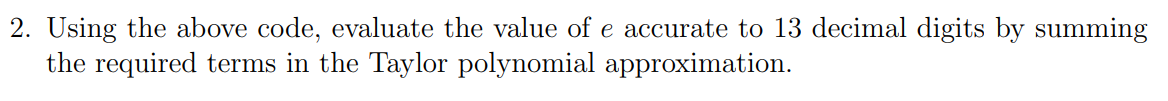

I guess we dont need to use those Horner functions to compute $e$.  

The Taylor series for $e^x$ (at $x = 1$) is  

$$
e = \sum_{k=0}^{\infty} \frac{1}{k!} = 1 + 1 + \frac{1}{2!} + \frac{1}{3!} + \cdots
$$

This is **not a polynomial with fixed coefficients** like  

$$
P(x) = a_N x^N + \cdots + a_0,
$$




In [9]:
def eval_e(x, n = 15):
  total = 1.0
  term = 1.0
  for k in range(1, n):
      term *= x / k
      total += term
  return np.round(total, 13).item()


In [10]:
eval_e(1), np.e

(2.7182818284582, 2.718281828459045)

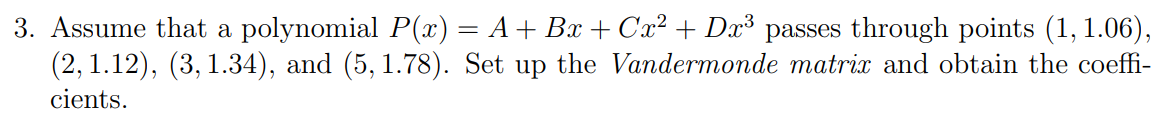

In [11]:
def vander(x):
  n = len(x)
  vander = np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      vander[i,j] = x[i] ** j
  return vander

In [12]:
x = np.array([1,2,3,5])

vander(x)

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   5.,  25., 125.]])

In [13]:
A = vander(x)
B = np.array([1.06, 1.12, 1.34, 1.78])

In [14]:
np.linalg.solve(A, B) # Or you can use other methods such as gauss elimination

array([ 1.28, -0.4 ,  0.2 , -0.02])

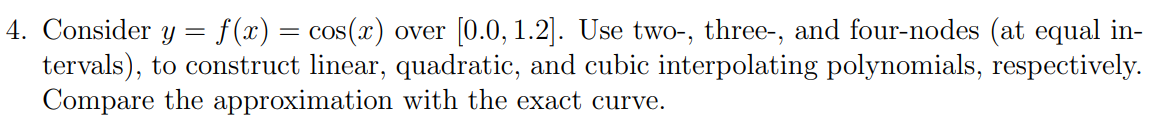

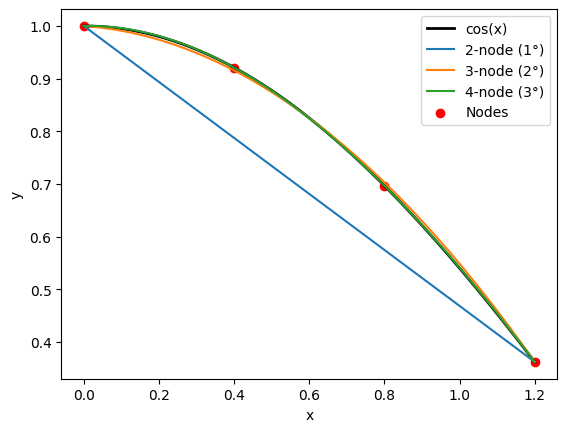

In [15]:
def poly_eval(a, x):
  result = np.zeros_like(x)
  for i, ai in enumerate(a):
    result += ai * (x ** i)
  return result

f = np.cos
x_plot = np.linspace(0, 1.2, 200)
plt.plot(x_plot, f(x_plot), 'k', label='cos(x)', linewidth=2)

for n in [2, 3, 4]:
  x_nodes = np.linspace(0, 1.2, n)
  y_nodes = f(x_nodes)
  A = vander(x_nodes)
  coeff = np.linalg.solve(A, y_nodes)
  y_interp = poly_eval(coeff, x_plot)
  plt.plot(x_plot, y_interp, label=f'{n}-node ({n-1}°)')

plt.scatter(np.linspace(0, 1.2, 4), np.cos(np.linspace(0, 1.2, 4)), c='r', label='Nodes')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

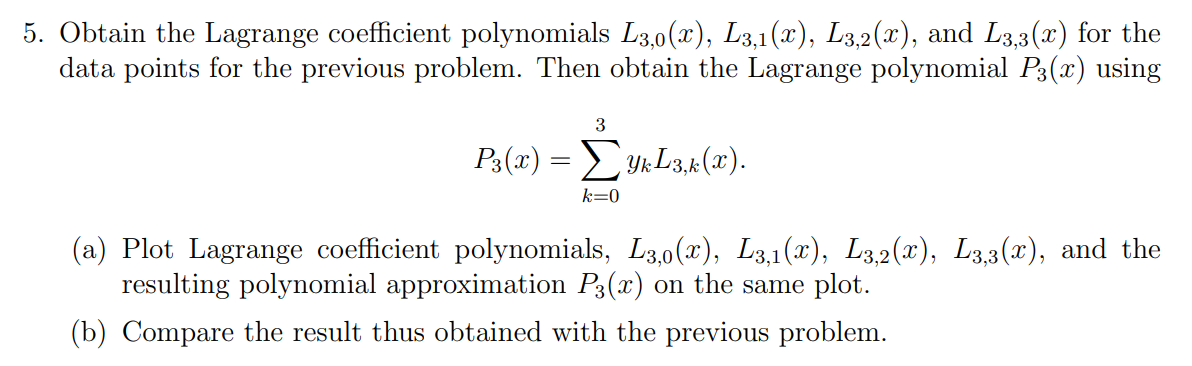

In [16]:
def L_k(x, x_nodes, k):
  result = 1
  for j in range(len(x_nodes)):
    if j != k:
      result *= (x - x_nodes[j]) / (x_nodes[k] - x_nodes[j])
  return result

def lagrange_poly(x, x_nodes, y_nodes):
  total = 0
  for k in range(len(x_nodes)):
    total += y_nodes[k] * L_k(x, x_nodes, k)
  return total


In [17]:
x_nodes = np.array([0.0, 0.4, 0.8, 1.2])
y_nodes = np.cos(x_nodes)

x = np.linspace(0, 1.2, 200)
f_exact = np.cos(x)
P3 = [lagrange_poly(xi, x_nodes, y_nodes) for xi in x]


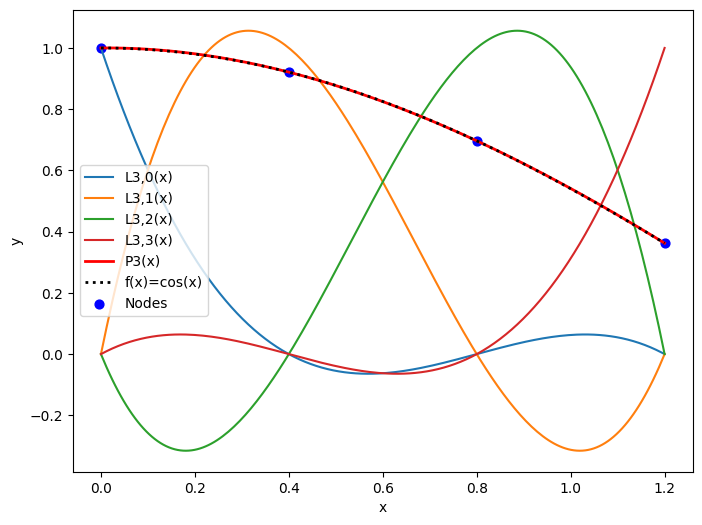

In [18]:
plt.figure(figsize=(8,6))
for k in range(len(x_nodes)):
  L_values = [L_k(xi, x_nodes, k) for xi in x]
  plt.plot(x, L_values, label=f'L3,{k}(x)')

plt.plot(x, P3, 'r', linewidth=2, label='P3(x)')
plt.plot(x, f_exact, 'k', linestyle=':', linewidth=2, label='f(x)=cos(x)')
plt.scatter(x_nodes, y_nodes, c='blue', s=40, label='Nodes')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

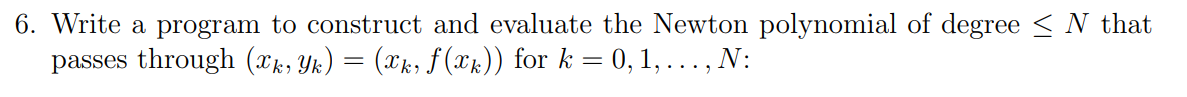

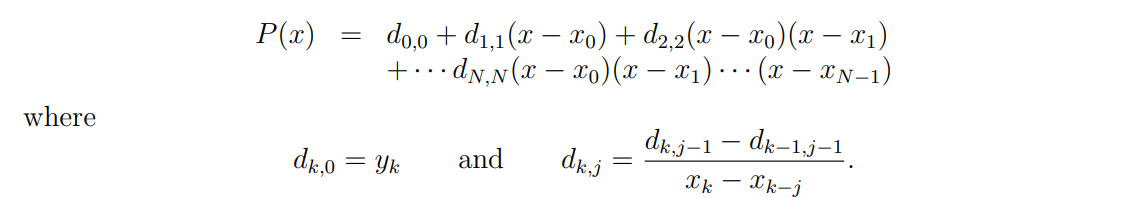

In [19]:
def divided_diff_table(x, y):
  n = len(x)
  table = np.zeros((n, n))
  table[:, 0] = y

  for j in range(1, n):
    for i in range(j, n):
      table[i][j] = (table[i][j-1] - table[i-1][j-1]) / (x[i] - x[i-j])
  return table

In [20]:
def newton_poly_eval(x, x_nodes, table):
  n = len(x_nodes)
  result = table[0,0]
  term = 1.0
  for k in range(1, n):
    term *= (x - x_nodes[k-1])
    result += table[k, k] * term
  return result


In [21]:
x_nodes = np.array([0.0, 0.4, 0.8, 1.2])
y_nodes = np.cos(x_nodes)
table = divided_diff_table(x_nodes, y_nodes)
table

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.92106099, -0.19734751,  0.        ,  0.        ],
       [ 0.69670671, -0.56088571, -0.45442275,  0.        ],
       [ 0.36235775, -0.83587239, -0.34373334,  0.09224117]])

In [22]:
x_test = 0.6
P_approx = newton_poly_eval(x_test, x_nodes, table)
P_approx.item(), np.cos(x_test).item()

(0.8248469734796113, 0.8253356149096783)

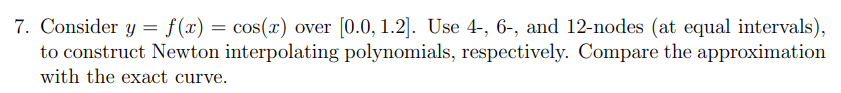

n = 4, max abs error = 9.161e-04
n = 6, max abs error = 3.836e-06
n = 12, max abs error = 2.376e-14


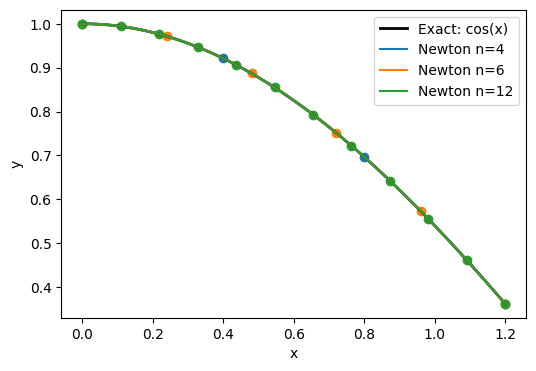

In [23]:
f = np.cos
x_plot = np.linspace(0.0, 1.2, 200)
y_true = f(x_plot)

plt.figure(figsize=(6, 4))
plt.plot(x_plot, y_true, 'k-', linewidth=2, label='Exact: cos(x)')

for n in [4, 6, 12]:
  x_nodes = np.linspace(0.0, 1.2, n)
  y_nodes = f(x_nodes)
  table = divided_diff_table(x_nodes, y_nodes)

  y_interp = np.array([newton_poly_eval(x, x_nodes, table) for x in x_plot])
  plt.plot(x_plot, y_interp, label=f'Newton n={n}')
  plt.scatter(x_nodes, y_nodes)

  err = np.max(np.abs(y_interp - y_true))
  print(f"n = {n}, max abs error = {err:.3e}")

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

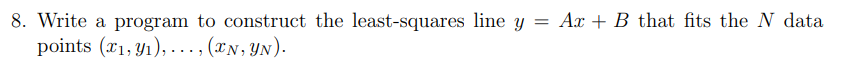

In [24]:
def least_squares_line(x, y):
  N = len(x)
  A = (N * np.sum(x * y) - np.sum(x) * np.sum(y)) / (N * np.sum(x**2) - (np.sum(x))**2)
  B = (np.sum(y) - A * np.sum(x)) / N
  return A, B

In [25]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([2.1, 2.9, 3.7, 4.5, 5.1])

A, B = least_squares_line(x, y)
print(f"A = {A:.4f}, B = {B:.4f}")

A = 0.7600, B = 1.3800


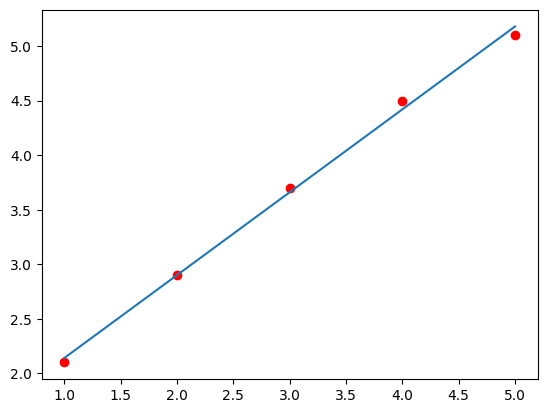

In [26]:
plt.scatter(x, y, color='red')
plt.plot(x, A*x + B, )
plt.show()

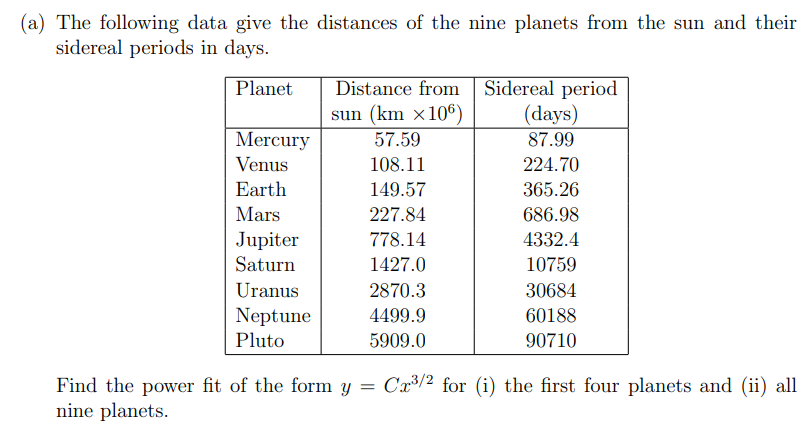

In [27]:
distance = np.array([57.59, 108.11, 149.57, 227.84, 778.14, 1427.0, 2870.3, 4499.9, 5909.0])
period   = np.array([87.99, 224.70, 365.26, 686.98, 4332.4, 10759, 30684, 60188, 90710])

def power_fit_least_squares(x, y):
  logx = np.log(x)
  logy = np.log(y)
  A, B = least_squares_line(logx, logy)
  n = A
  C = np.exp(B)
  return C, n

In [28]:
C1, n1 = power_fit_least_squares(distance[:4], period[:4])
print(f"First four planets:  y = {C1:.4f} * x^{n1:.4f}")

First four planets:  y = 0.2059 * x^1.4941


In [29]:
C2, n2 = power_fit_least_squares(distance, period)

print(f"All nine planets:  y = {C2:.4f} * x^{n2:.4f}")

All nine planets:  y = 0.2013 * x^1.4989


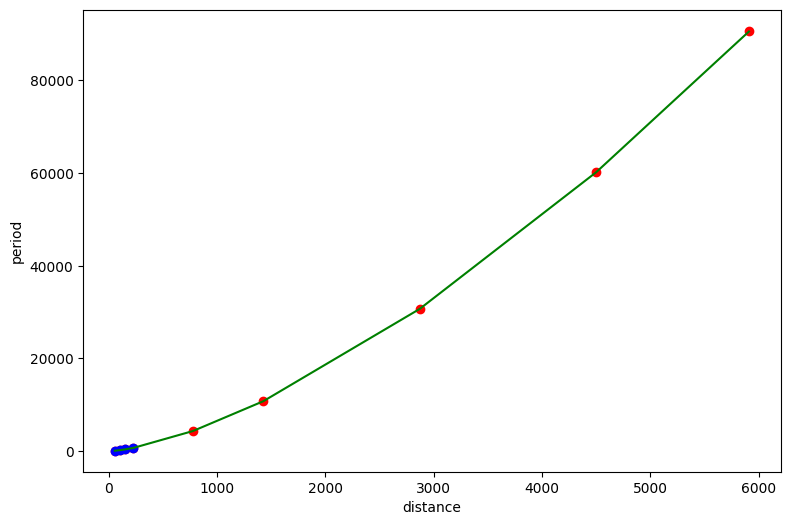

In [30]:
plt.figure(figsize=(9,6))

y_fit1 = C1 * distance[:4]**n1
y_fit2 = C2 * distance**n2

plt.scatter(distance, period, color= 'r')
plt.scatter(distance[:4], y_fit1, color = 'b')
plt.plot(distance, y_fit2, color = 'g')

plt.xlabel('distance')
plt.ylabel('period')
plt.show()

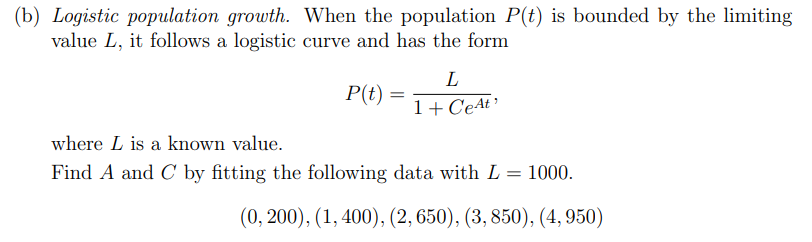

In [31]:
t = np.array([0, 1, 2, 3, 4])
P = np.array([200, 400, 650, 850, 950])
L = 1000

y = np.log(L / P - 1)
A, B = least_squares_line(t, y)
C = np.exp(B)

P_fit = L / (1 + C * np.exp(A * t))


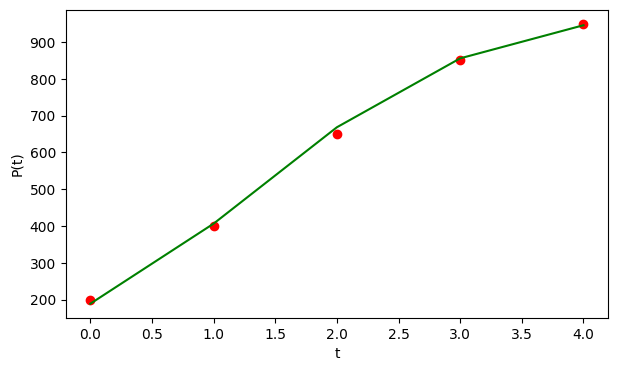

In [32]:
plt.figure(figsize=(7, 4))
plt.scatter(t, P, color='r')
plt.plot(t, P_fit, color='g')
plt.xlabel('t')
plt.ylabel('P(t)')
plt.show()

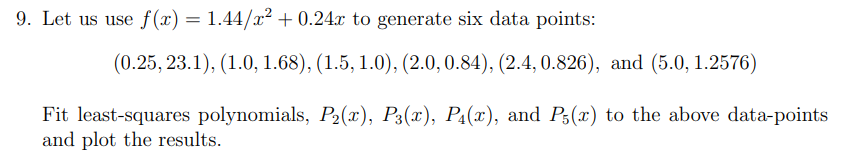

In [33]:
x_nodes = np.array([0.25, 1.0, 1.5, 2.0, 2.4, 5.0])
y_nodes = np.array([23.1, 1.68, 1.0, 0.84, 0.826, 1.2576])

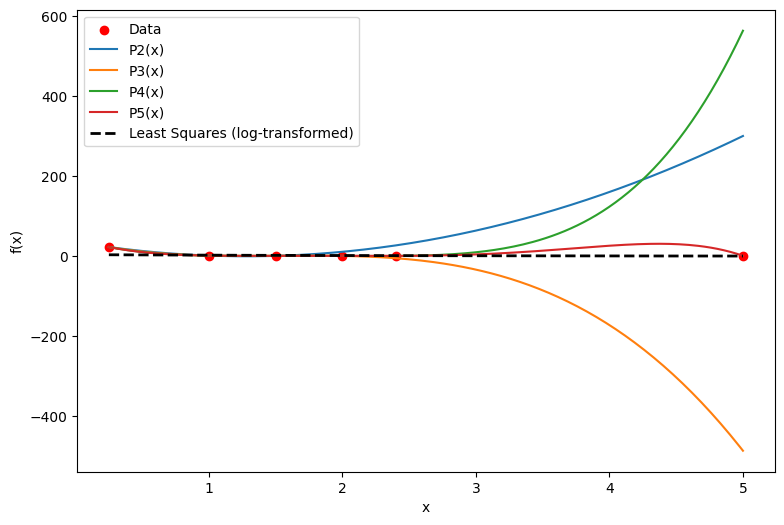

In [34]:
plt.figure(figsize=(9,6))
plt.scatter(x_nodes, y_nodes, color='r', label='Data')

for n in [2, 3, 4, 5]:
  x_fit = np.linspace(min(x_nodes), max(x_nodes), 200)
  y_fit = [lagrange_poly(xi, x_nodes[:n+1], y_nodes[:n+1]) for xi in x_fit]
  plt.plot(x_fit, y_fit, label=f'P{n}(x)')


x_valid = x_nodes
y_valid = np.log(y_nodes)
A, B = least_squares_line(x_valid, y_valid)

y_fit_ls = np.exp(B) * np.exp(A * x_fit)

plt.plot(x_fit, y_fit_ls, 'k--', lw=2, label='Least Squares (log-transformed)')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

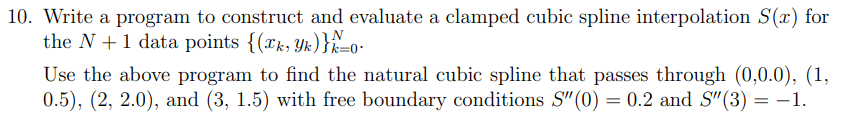

Will update later.....